<a href="https://colab.research.google.com/github/Marko2707/AutomatedChessDetection/blob/altmethod/ChessDetectV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()  # Select the zipped folder

Saving test2.jpg to test2.jpg


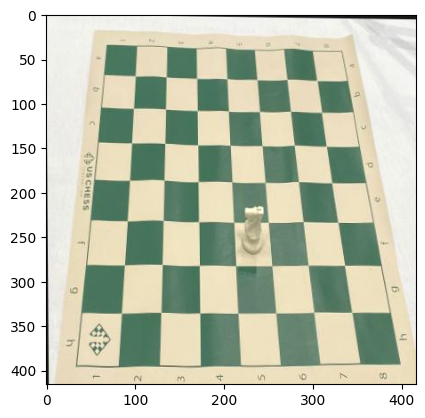

In [ ]:
image = cv2.imread(r"test2.jpg") # opencv reads images as BGR format

gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image) # matplotlib expects RGB format

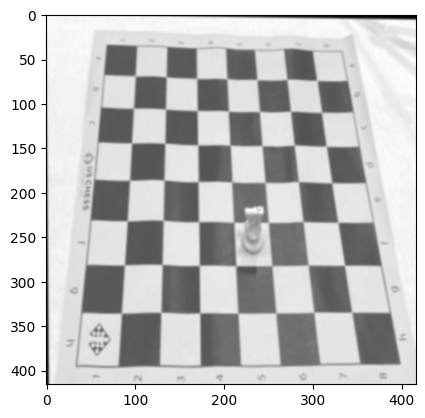

In [ ]:
gaussian_blur = cv2.GaussianBlur(gray_image,(5,5),0)

plt.imshow(gaussian_blur,cmap="gray")

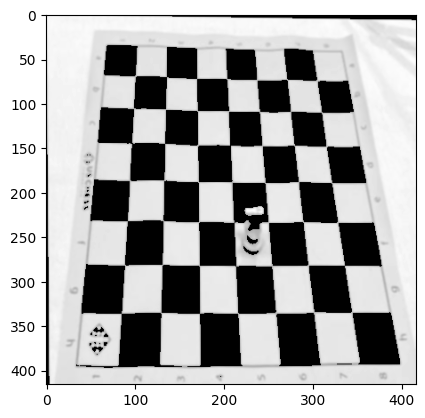

In [ ]:
ret,otsu_binary = cv2.threshold(gaussian_blur,0,255,cv2.THRESH_TOZERO+cv2.THRESH_OTSU)

plt.imshow(otsu_binary,cmap="gray")

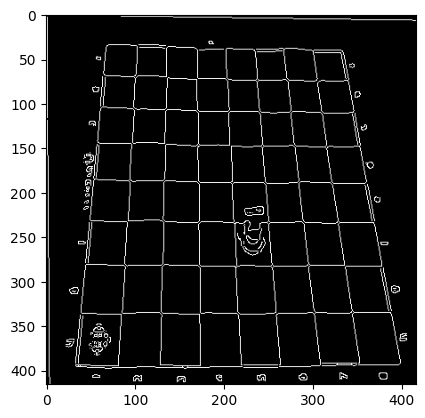

In [ ]:
canny = cv2.Canny(otsu_binary,2,120)

plt.imshow(canny,cmap="gray")

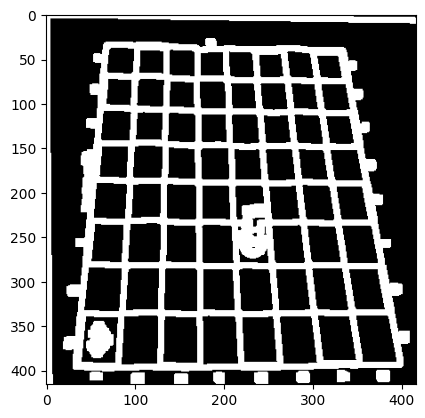

In [ ]:
kernel = np.ones((7, 7), np.uint8)

img_dilation = cv2.dilate(canny, kernel, iterations=1)

plt.imshow(img_dilation,cmap="gray")

In [ ]:
lines = cv2.HoughLinesP(img_dilation, 1, np.pi/180, threshold=200, minLineLength=100, maxLineGap=50)

if lines is not None:
    for i, line in enumerate(lines):
        x1, y1, x2, y2 = line[0]

        # draw lines
        cv2.line(img_dilation, (x1, y1), (x2, y2), (255,255,255), 2)

plt.imshow(img_dilation,cmap="gray")

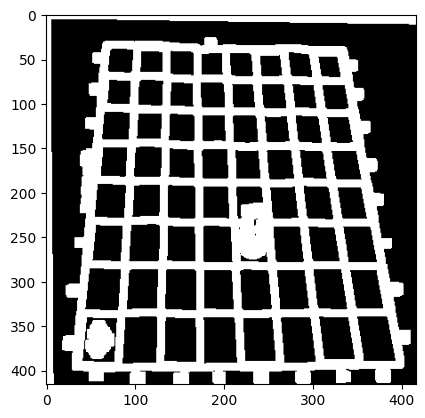

In [ ]:
kernel = np.ones((3, 3), np.uint8)

img_dilation_2 = cv2.dilate(img_dilation, kernel, iterations=1)

plt.imshow(img_dilation_2,cmap="gray")

Contour area: 123818.5
Contour area: 4.0
Contour area: 1818.0
Contour area: 1692.5
Contour area: 1901.0
Contour area: 1788.5
Contour area: 747.5
Contour area: 1809.5
Contour area: 1657.0
Contour area: 2000.5
Contour area: 1355.5
Contour area: 1462.5
Contour area: 1466.0
Contour area: 1498.5
Contour area: 1540.0
Contour area: 1635.0
Contour area: 1538.0
Contour area: 1742.0
Contour area: 2.0
Contour area: 169.5
Contour area: 4.0
Contour area: 4.0
Contour area: 1309.0
Contour area: 1201.5
Contour area: 1288.0
Contour area: 1349.0
Contour area: 1276.0
Contour area: 1287.0
Contour area: 1429.5
Contour area: 20.5
Contour area: 4.0
Contour area: 1000.5
Contour area: 1040.0
Contour area: 672.0
Contour area: 1060.5
Contour area: 1099.5
Contour area: 1196.5
Contour area: 1096.5
Contour area: 1275.0
Contour area: 955.0
Contour area: 855.0
Contour area: 958.0
Contour area: 876.0
Contour area: 1001.0
Contour area: 926.5
Contour area: 943.5
Contour area: 1059.5
Contour area: 741.5
Contour area: 761

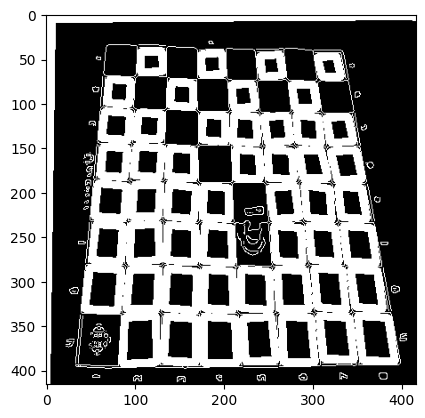

In [ ]:
import cv2
import matplotlib.pyplot as plt

# find contours --> img_dilation_2
board_contours, hierarchy = cv2.findContours(img_dilation_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

square_centers=list()

# draw filtered rectangles to "canny" image for better visualization
board_squared = canny.copy()

for contour in board_contours:
    area = cv2.contourArea(contour)
    print(f"Contour area: {area}")  # Print contour area
    if 10 < cv2.contourArea(contour) < 8000:
        # Approximate the contour to a simpler shape
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Ensure the approximated contour has 4 points (quadrilateral)
        if len(approx) == 4:
            pts = [pt[0] for pt in approx]  # Extract coordinates

            # Define the points explicitly
            pt1 = tuple(pts[0])
            pt2 = tuple(pts[1])
            pt4 = tuple(pts[2])
            pt3 = tuple(pts[3])

            x, y, w, h = cv2.boundingRect(contour)
            center_x=(x+(x+w))/2
            center_y=(y+(y+h))/2

            square_centers.append([center_x,center_y,pt2,pt1,pt3,pt4])



            # Draw the lines between the points
            cv2.line(board_squared, pt1, pt2, (255, 255, 0), 7)
            cv2.line(board_squared, pt1, pt3, (255, 255, 0), 7)
            cv2.line(board_squared, pt2, pt4, (255, 255, 0), 7)
            cv2.line(board_squared, pt3, pt4, (255, 255, 0), 7)


plt.imshow(board_squared,cmap="gray")

In [ ]:
sorted_coordinates = sorted(square_centers, key=lambda x: x[1], reverse=True)

groups = []
current_group = [sorted_coordinates[0]]

for coord in sorted_coordinates[1:]:
    if abs(coord[1] - current_group[-1][1]) < 50:
        current_group.append(coord)
    else:
        groups.append(current_group)
        current_group = [coord]

# Append the last group
groups.append(current_group)

# Step 2: Sort each group by the second index (column values)
for group in groups:
    group.sort(key=lambda x: x[0])

# Step 3: Combine the groups back together
sorted_coordinates = [coord for group in groups for coord in group]

sorted_coordinates[:10]

[[105.5, 366.5, (124, 391), (123, 339), (88, 341), (86, 393)],
 [151.0, 366.0, (168, 342), (135, 340), (132, 389), (168, 391)],
 [196.0, 367.0, (212, 342), (177, 340), (177, 392), (214, 392)],
 [240.0, 365.5, (258, 389), (253, 340), (221, 342), (224, 390)],
 [283.5, 366.5, (297, 341), (265, 340), (267, 391), (302, 391)],
 [327.0, 364.0, (340, 341), (307, 339), (312, 387), (346, 388)],
 [371.5, 365.0, (384, 341), (350, 339), (356, 389), (392, 390)],
 [64.0, 309.5, (84, 287), (49, 285), (43, 331), (80, 333)],
 [108.5, 309.5, (126, 287), (94, 287), (90, 331), (124, 331)],
 [151.5, 310.0, (169, 289), (136, 286), (133, 330), (168, 333)]]

In [ ]:
for num in range(len(sorted_coordinates)-1):
    if abs(sorted_coordinates[num][1] - sorted_coordinates[num+1][1])< 50 :
        if sorted_coordinates[num+1][0] - sorted_coordinates[num][0] > 150:
            x=(sorted_coordinates[num+1][0] + sorted_coordinates[num][0])/2
            y=(sorted_coordinates[num+1][1] + sorted_coordinates[num][1])/2
            p1=sorted_coordinates[num+1][5]
            p2=sorted_coordinates[num+1][4]
            p3=sorted_coordinates[num][3]
            p4=sorted_coordinates[num][2]
            sorted_coordinates.insert(num+1,[x,y,p1,p2,p3,p4])

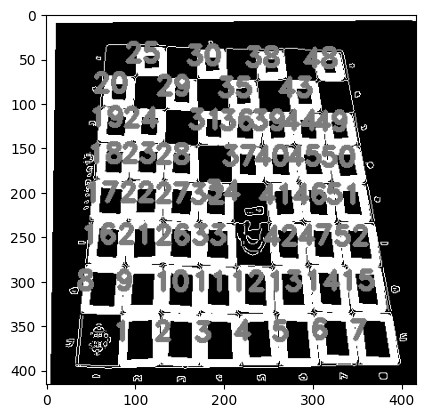

In [ ]:
square_num=1
for cor in sorted_coordinates:
  cv2.putText(img = board_squared,text = str(square_num),org = (int(cor[0])-30, int(cor[1])),
    fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 1,color = (125, 246, 55),thickness = 3)
  square_num+=1

plt.imshow(board_squared,cmap="gray")